In [240]:
import pandas as  pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


## Data Retrieval

In [165]:
df=pd.read_csv("Train.csv")

### Know Your Data

In [166]:
#shape give (num_rows,num_cols)
print(df.shape)

(8523, 12)


In [167]:
#10 rows from the dataframe
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7530,FDO57,NaN,Low Fat,0.190337,Snack Foods,159.4578,OUT019,1985,Small,Tier 1,Grocery Store,160.4578
4907,FDC03,8.575,Regular,0.072253,Dairy,196.5794,OUT017,2007,NaN,Tier 2,Supermarket Type1,5267.1438
3403,FDJ41,6.850,LF,0.022883,Frozen Foods,261.2594,OUT046,1997,Small,Tier 1,Supermarket Type1,2878.2534
6729,FDH60,19.700,reg,0.080737,Baking Goods,197.0110,OUT046,1997,Small,Tier 1,Supermarket Type1,3338.9870
4774,NCK30,14.850,Low Fat,0.061102,Household,253.2698,OUT045,2002,NaN,Tier 2,Supermarket Type1,2283.0282
7605,FDD53,16.200,Low Fat,0.044473,Frozen Foods,43.3454,OUT017,2007,NaN,Tier 2,Supermarket Type1,922.7988
2810,FDK41,14.300,Low Fat,0.127518,Frozen Foods,86.0224,OUT035,2004,Small,Tier 2,Supermarket Type1,1022.6688
3504,FDK09,15.200,Low Fat,0.092282,Snack Foods,227.2352,OUT017,2007,NaN,Tier 2,Supermarket Type1,4122.6336
7292,FDP49,NaN,Regular,0.068754,Breakfast,54.5614,OUT027,1985,Medium,Tier 3,Supermarket Type3,1713.1034
5121,FDB03,17.750,Regular,0.157076,Dairy,240.5538,OUT049,1999,Medium,Tier 1,Supermarket Type1,3845.6608


In [168]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [169]:
#set the datatypes
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [170]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Handling Missing Value

In [171]:
# missing value of Item-weight column with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)


/tmp/ipykernel_43204/4227474770.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)


In [172]:
mode_outlet_size=df.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [173]:
missing_values=df['Outlet_Size'].isnull()

In [174]:
#Replacing missing values with mode for common outlet_Size
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x : mode_outlet_size[x])

In [175]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data visualization

<Figure size 600x600 with 0 Axes>

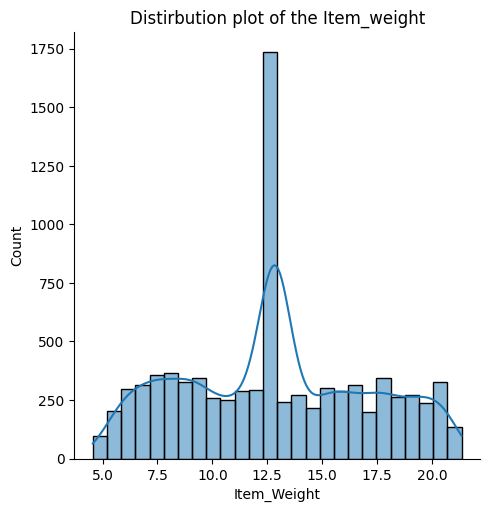

In [176]:
#plotting the distirbution of numerrical value
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight'],kde=True)
plt.title("Distirbution plot of the Item_weight")
plt.show()

<Figure size 600x600 with 0 Axes>

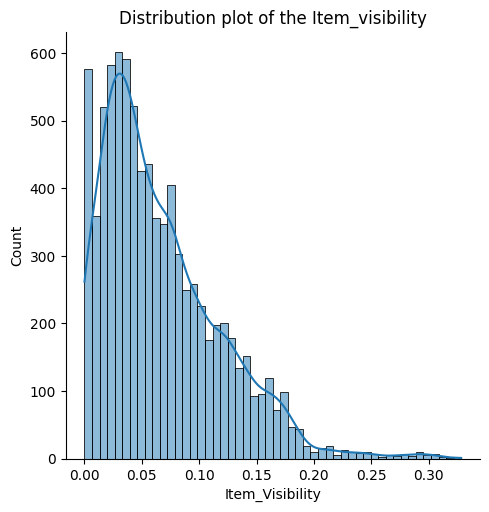

In [177]:
#plotting the distirbution of numerrical value
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'],kde=True)
plt.title("Distribution plot of the Item_visibility")
plt.show()

<Figure size 600x600 with 0 Axes>

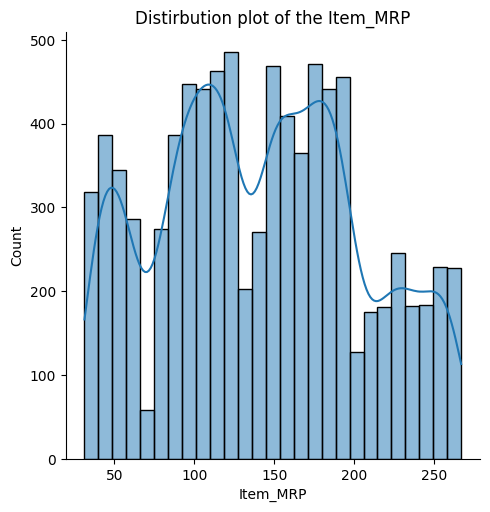

In [178]:
#plotting the distirbution of numerrical value
plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'],kde=True)
plt.title("Distirbution plot of the Item_MRP")
plt.show()

<Figure size 600x600 with 0 Axes>

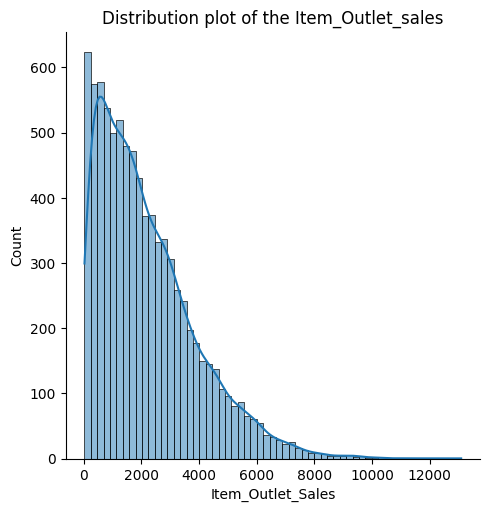

In [179]:
#plotting the distirbution of numerrical value
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'],kde=True)
plt.title("Distribution plot of the Item_Outlet_sales")
plt.show()

Text(0.5, 1.0, 'Outlide_Establishment_Year')

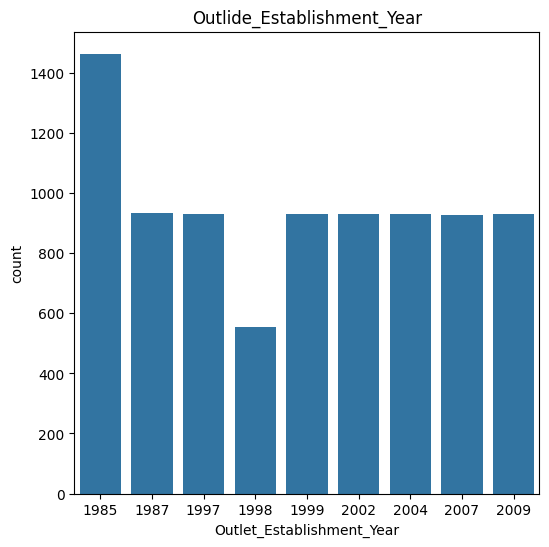

In [180]:
#  For the Outlet_Establishment_Year column 
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",data=df)
plt.title("Outlide_Establishment_Year")

### Categorical data visualization

Text(0.5, 1.0, 'Item_fat_Content')

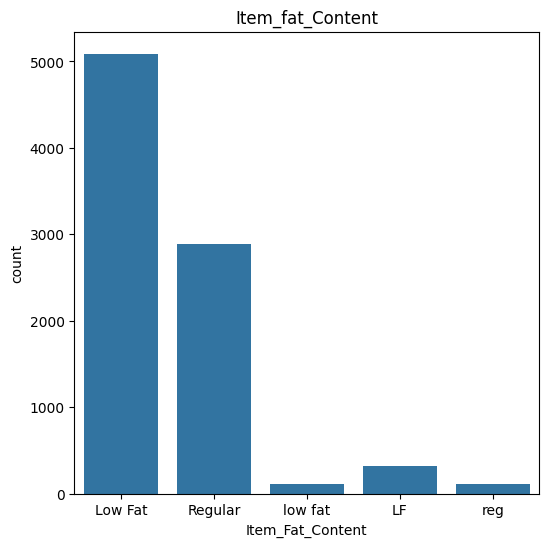

In [181]:
#  For the Item_fat column
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=df)
plt.title("Item_fat_Content")

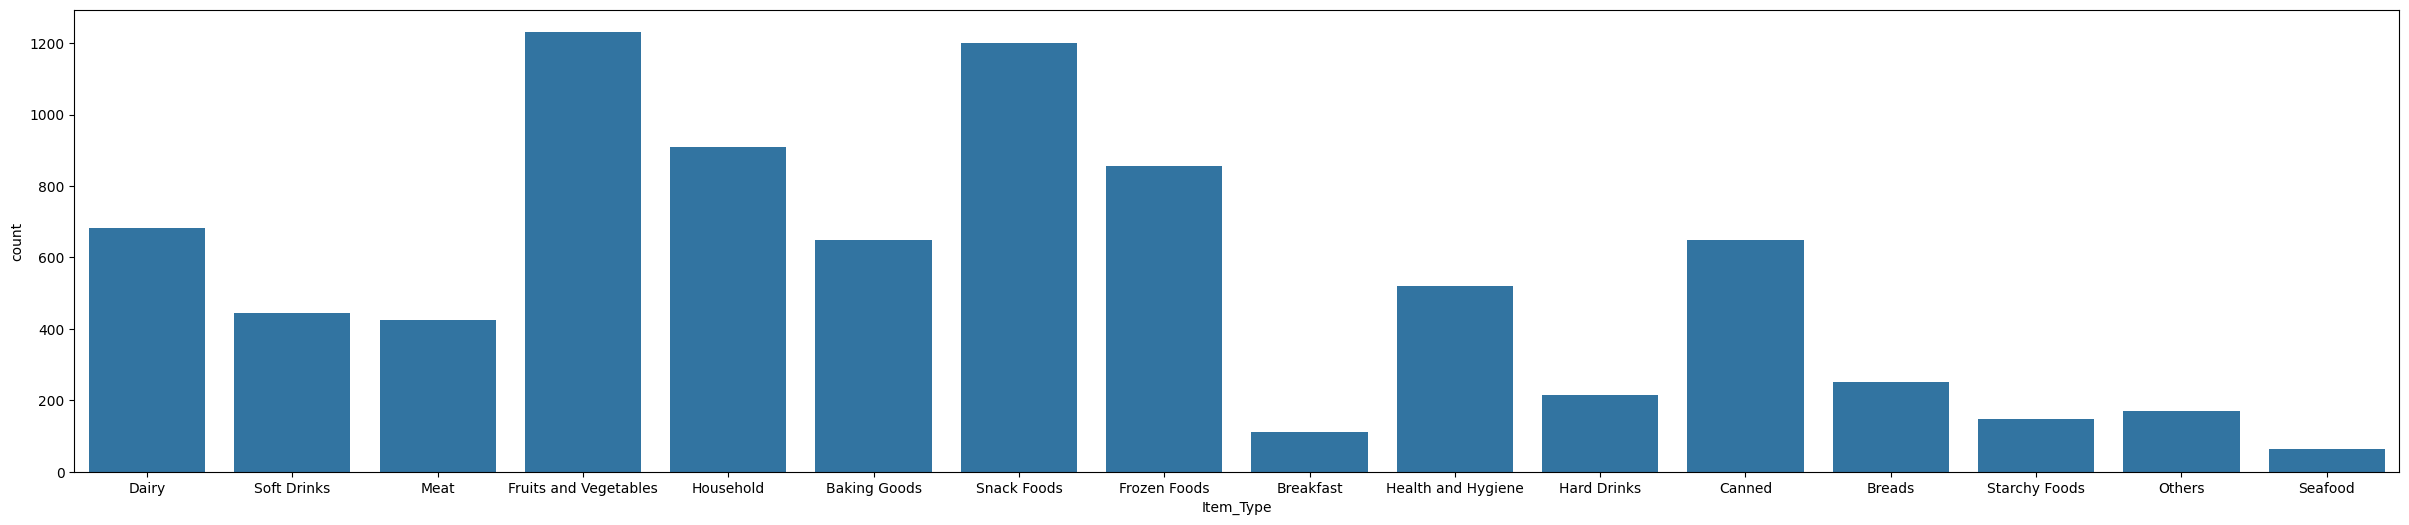

In [182]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

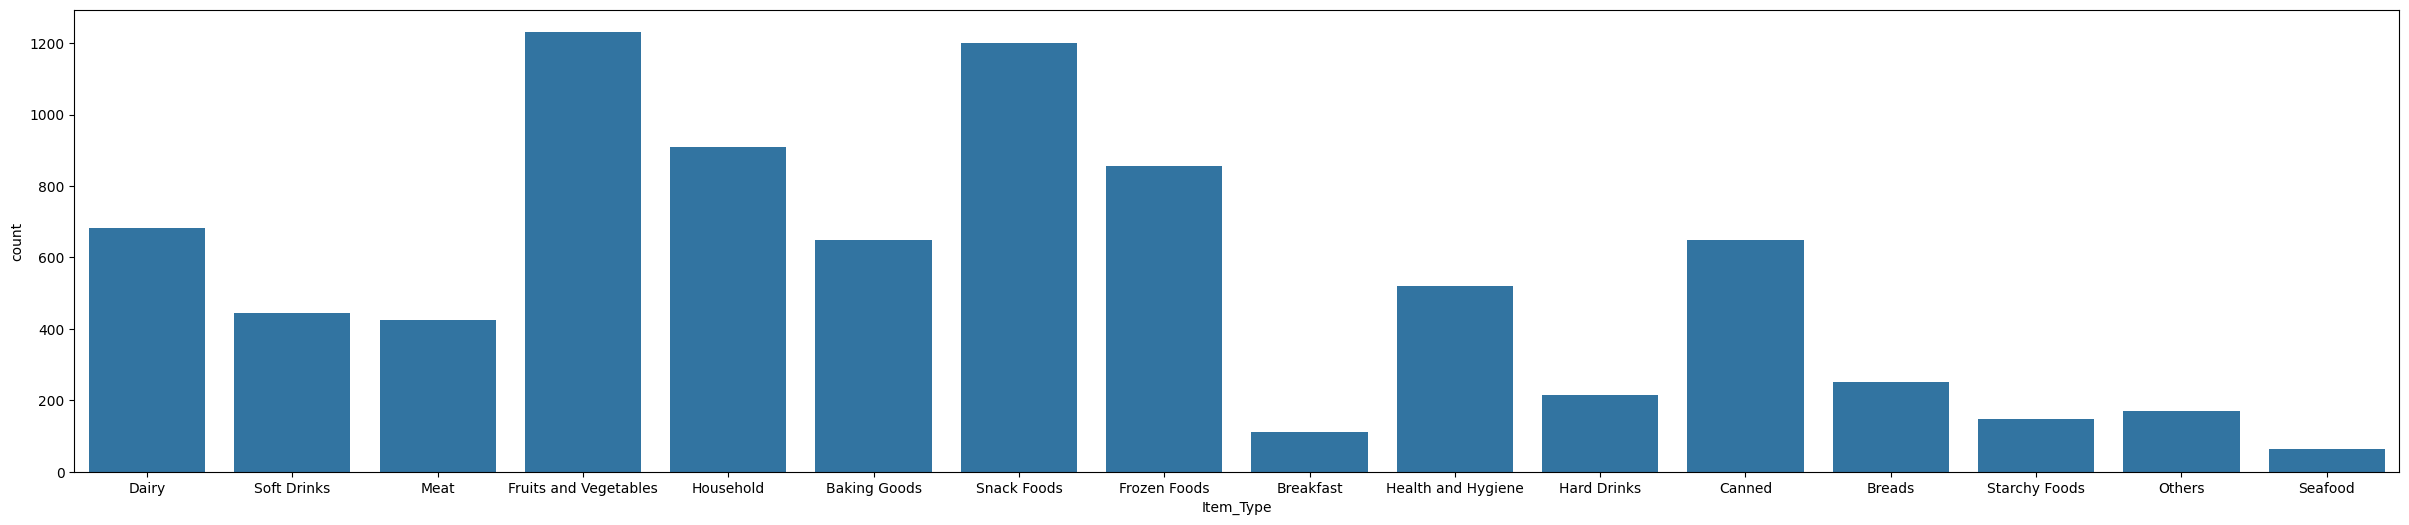

In [183]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

## Data preparation

In [184]:
#Item_fat content values content different name for same category
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [185]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [186]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [187]:
#handling categorical value

In [188]:
#Label encoding
encoder=LabelEncoder()
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [246]:
df.corr()#Appltying correlation

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012044,0.028015,0.024756,-0.014105,-0.000566,0.008050
Item_Fat_Content,-0.021157,1.000000,0.048045,-0.139434,0.006063,-0.001262,0.002199,0.012280
Item_Visibility,-0.012044,0.048045,1.000000,-0.035995,-0.000701,0.091969,-0.169474,-0.188566
Item_Type,0.028015,-0.139434,-0.035995,1.000000,0.032651,-0.000218,0.003053,0.019908
Item_MRP,0.024756,0.006063,-0.000701,0.032651,1.000000,0.000872,-0.001975,0.509671
Outlet_Size,-0.014105,-0.001262,0.091969,-0.000218,0.000872,1.000000,-0.401373,-0.213421
Outlet_Type,-0.000566,0.002199,-0.169474,0.003053,-0.001975,-0.401373,1.000000,0.476759
Item_Outlet_Sales,0.008050,0.012280,-0.188566,0.019908,0.509671,-0.213421,0.476759,1.000000


In [189]:
df=df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Type','Item_Outlet_Sales']]

## Feature Transformation

In [190]:
#item visibility column and item_outlet_sales column is Rightskewed so applying log transformation.

In [191]:
df['Item_Visibility']=np.log1p(df['Item_Visibility'])
df["Item_Outlet_Sales"]=np.log(df['Item_Outlet_Sales'])

<Figure size 600x600 with 0 Axes>

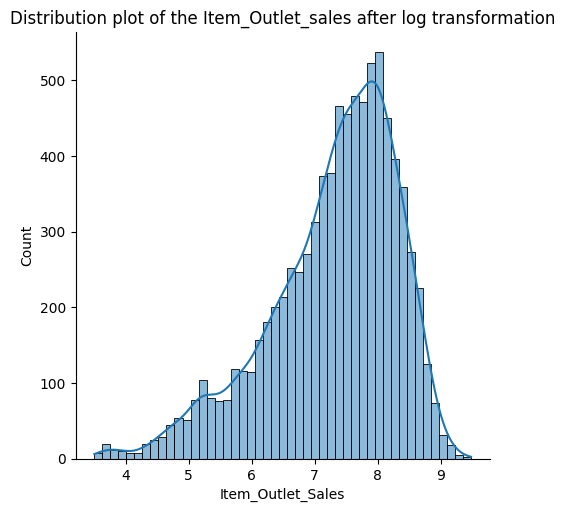

In [241]:
#Distribution after applying log transformation
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'],kde=True)
plt.title("Distribution plot of the Item_Outlet_sales after log transformation")
plt.show()

<Figure size 600x600 with 0 Axes>

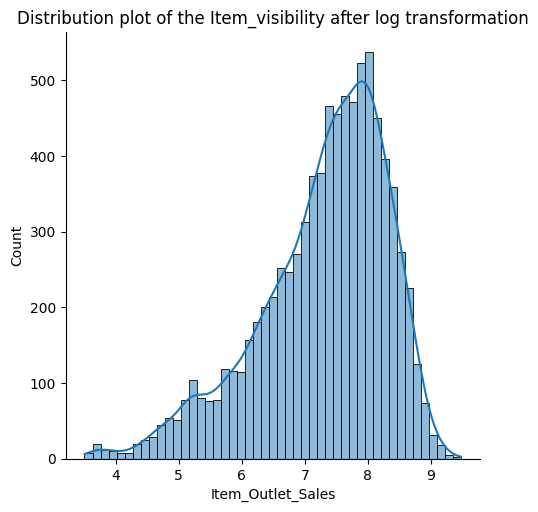

In [242]:
#Distribution after applying log transformation
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'],kde=True)
plt.title("Distribution plot of the Item_visibility after log transformation")
plt.show()

## Model training and Evaluation

In [244]:
X = df.drop(columns='Item_Outlet_Sales')#Features
Y = df['Item_Outlet_Sales']#target

In [247]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)# train test split
print(X.shape, X_train.shape, X_test.shape)

(8523, 7) (6818, 7) (1705, 7)


In [248]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [249]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)


In [252]:
# R squared Value
error_train = metrics.mean_squared_error(Y_train, training_data_prediction)

In [253]:
print('MSE value = ',error_train)

MSE value =  0.5166724653127337
